<a href="https://colab.research.google.com/github/ravi-prakash1907/Cryptology/blob/main/Practicals/notebooks/bruteForceFact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Required Libraries



In [ ]:
from time import time
from math import sqrt
import matplotlib.pyplot as plt

### Factorization

#### List all Factor Combinations

In [46]:
# for positive numbers only
def factorize(num):
  main = []
  root = int(sqrt(num))
  
  for i in range(2, root+1):
    if num % i == 0:
      main.append([i, num//i])
      endFc = factorize(num//i)

      if endFc == num//i:
        continue
      else:
        for fc in endFc:
          fc.insert(0,i)
          fc.sort()
          main.append(fc)
  
  return num if main == [] else main
  

In [47]:
factorize(12)

[[2, 6], [2, 2, 3], [3, 4], [2, 2, 3]]

##### List all **UNIQUE** Factor Combinations

In [44]:
def factorization(num): 
  ####  to print all combinations of the factors
  universal = [1, num]
  factors = factorize(num)

  if factors == num:
    return universal
  else:
    factors.insert(0,universal)
    temp = factors[:]
    new = []
    
    for pos in range(len(factors)):
      if factors[pos] in factors[pos+1:]:
        temp.remove(factors[pos])
    factors = temp

  return factors

In [45]:
factorization(12)

[[1, 12], [2, 6], [3, 4], [2, 2, 3]]

#### List all Factors

In [42]:
def getFactors(num):
  main = [1]
  root = int(sqrt(num))
  
  for i in range(2, root+1):
    if num % i == 0:
      main.extend([i, num//i])
      endFc = getFactors(num//i)

      if endFc[0] == num//i:
        continue
      else:
        for fc in endFc:
          #fc.extend([i])
          #fc.sort()
          main.extend([fc])
  
  main.append(num)
  main = list(set(main))
  return main

In [43]:
getFactors(12)

[1, 2, 3, 4, 6, 12]

## Driver Function for User Input

In [10]:
def driverFun():
  # taking input
  num = int(input("Enter a (positive) integer: "))

  # finding all fectors
  factors = getFactors(num)
  print("Factors of {} are {}".format(num, set(factors)))
  

In [ ]:
driverFun()

Enter a (positive) integer: 100
Factors of 100 are {1, 2, 4, 5, 100, 10, 50, 20, 25}


 ## Driver Code for Automatic Input Generation

In [11]:
def plotGraph(n):
  c='#f16a70'
  marker="P"

  print("")
  for num in range(10**(n-1), 10**n):
    startTime = time()
    factors = getFactors(i)
    endTime = time()
    exeTime = endTime - startTime
    #print("Time talen to find factors of {} is : {}".format(i, exeTime))
    
    plt.plot(i, exeTime, c=c, marker=marker)
  plt.show()

In [ ]:
def driveForNNum():
  for noOfDigits in range(1,6):
    plotGraph(noOfDigits):
      #

In [ ]:
def driveForNNum():
  for i in range(1000):
    startTime = time()
    factors = getFactors(i)
    endTime = time()
    exeTime = endTime - startTime
    #print("Time talen to find factors of {} is : {}".format(i, exeTime))

    # plotting
    if i//10 == 0:
      c='#f16a70'
      marker="P"
    elif i//100 == 0:
      c='#616a33'
      marker="s"
    elif i//1000 == 0:
      c='#ff2270'
      marker="D"
    else:
      c='red'
      marker="ro"
    plt.plot(i, exeTime, c=c, marker=marker)
  plt.show()

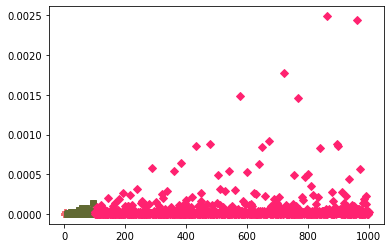

In [ ]:
driveForNNum()

In [16]:
def driveForNNum():
  numOfDigit = int(input("Upto how many number of digits? "))
  num = int(input("Enter a single digit number: "))
  num %= 10

  numbers = []
  
  for i in range(numOfDigit):
    n = num**(i+1)
    numbers.append(n)

    startTime = time()
    factors = getFactors(n)
    endTime = time()
    exeTime = endTime - startTime

    #print("Time talen to find factors of {} is : {}".format(i, exeTime))
    plt.plot(i, exeTime, c='#f16a70', marker='P')
  
  print("Numbers for factor: ",numbers,'\n\n')
  plt.show()


In [19]:
driveForNNum()

Upto how many number of digits? 6
Enter a single digit number: 4


AttributeError: ignored